# AGSC (Attention Guided Smart Cropping) visualization

### 1. import relative package

In [13]:
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from agsc import AttentionCrop
from config import CLIP_MODEL_NAME_DEFAULT, ATTENTION_CROP_OUTPUT_SIZE_DEFAULT

IMAGE_PATH = 'test_img.png' 
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CLIP_MODEL_NAME = CLIP_MODEL_NAME_DEFAULT
CROP_OUTPUT_SIZE = ATTENTION_CROP_OUTPUT_SIZE_DEFAULT

print(f"device: {DEVICE}")
print(f"image to be tested: {IMAGE_PATH}")

device: cuda
image to be tested: test_img.png


### 2. load and show

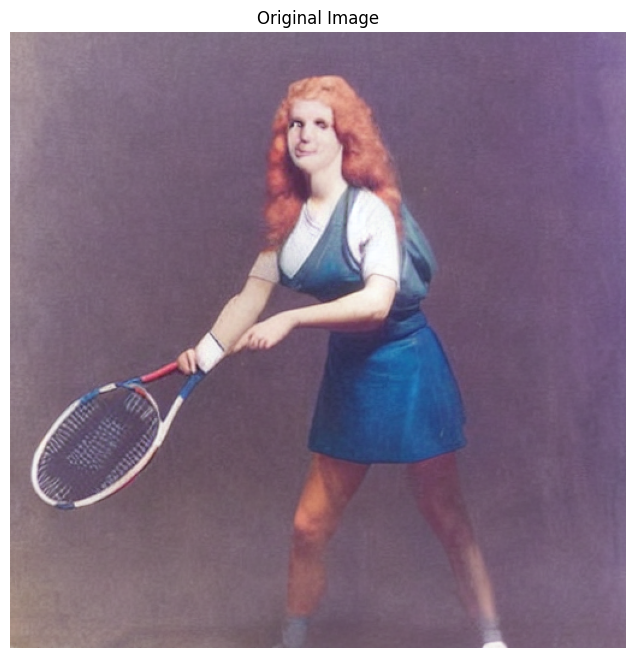

In [14]:
original_image = Image.open(IMAGE_PATH).convert('RGB')

plt.figure(figsize=(8, 8))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

### 3. Initialize and visualize AttentionCrop

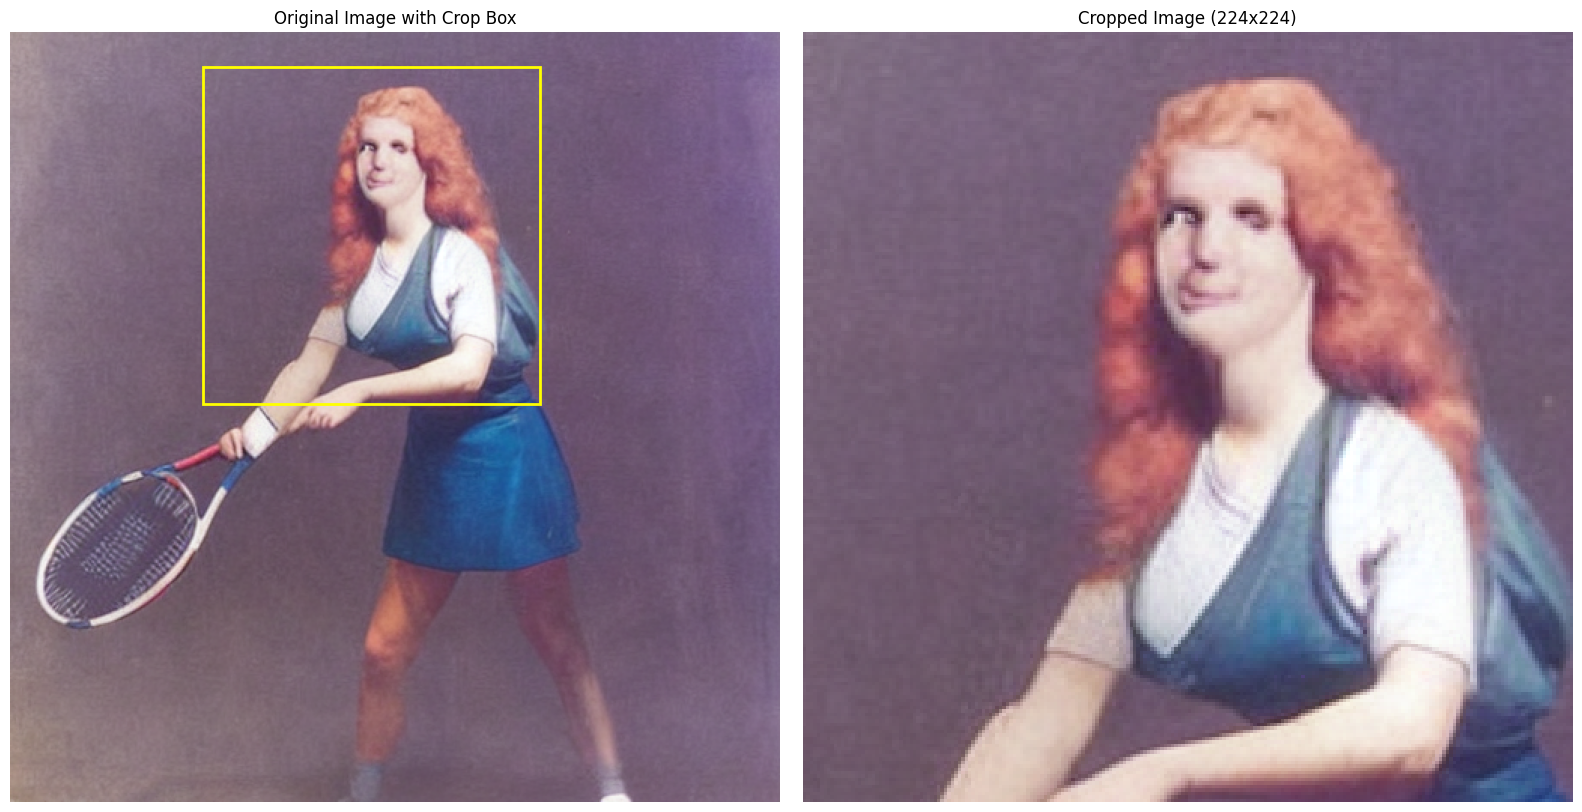

In [15]:
attention_cropper = AttentionCrop(
    output_size=CROP_OUTPUT_SIZE,
    clip_model_name=CLIP_MODEL_NAME,
    device=DEVICE
)

cropped_image, crop_coords = attention_cropper(original_image)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(original_image)
axes[0].set_title('Original Image with Crop Box')
axes[0].axis('off')

if crop_coords:
    x0, y0, x1, y1 = crop_coords
    rect_width = x1 - x0
    rect_height = y1 - y0
    rect = patches.Rectangle((x0, y0), rect_width, rect_height, linewidth=2, edgecolor='yellow', facecolor='none')
    axes[0].add_patch(rect)

axes[1].imshow(cropped_image)
axes[1].set_title(f'Cropped Image ({cropped_image.width}x{cropped_image.height})')
axes[1].axis('off')

plt.tight_layout()
plt.show()